# EDA 

**Author** : Devanshi Verma
<br>
**Date**: July-28-2020
<br>
**Topic**: ASHRAE - Great Energy Predictor III
<br>
**Output**: HTML

## Theory

The two key criterias regarding energy savings
- Forecasting future energy usage without improvements
- Forecasting energy use after a specific set of improvements have been implemented

Issue: Once the improvements are done, we don't have any idea about how much enregy the building would have consumed without the changes. Therefore, the Competition allows us to build such models which help us in finding out how much energy could have been consumed

In [16]:
#importing all the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#importing the datasets
train_data=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/train.csv')


In [23]:
print("Shape of the dataframe is {}".format(train_data.shape))
print("\n")
print("The data is from {} to {}".format(train_data.sort_values(by='timestamp').iloc[0,2],train_data.sort_values(by='timestamp').iloc[-1,2]))
print("\n")
print("The number of buildings are {}".format(train_data['building_id'].nunique()))
print("\n")
train_data.head()

Shape of the dataframe is (20216100, 4)


The data is from 2016-01-01 00:00:00 to 2016-12-31 23:00:00
The number of buildings are 1449


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


### Different Types of Meters

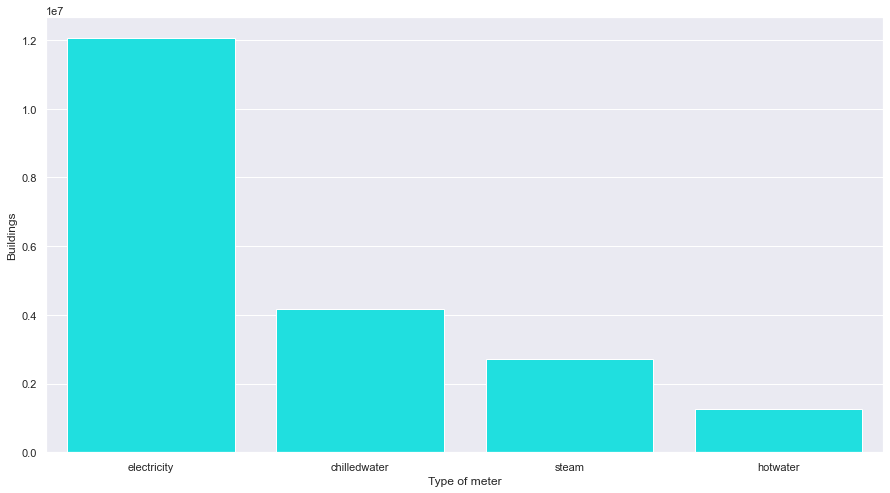

In [39]:
sns.set()
a=train_data.groupby('meter').count()[['building_id']]
x1=["electricity","chilledwater","steam","hotwater"]
plt.figure(figsize=(15,8))
ax=sns.barplot(data = a
            ,x = x1
            ,y = a["building_id"]
            ,color = 'cyan' 
            )
ax.set(xlabel='Type of meter', ylabel='Buildings')
plt.show()

*The most common meter type is : Electricity*

### Meter Reading Distribution

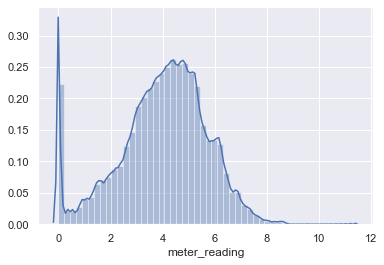

In [48]:
sns.set()
elec=train_data[train_data['meter']==0]
ax=sns.distplot(np.log1p(elec['meter_reading']),hist=True,bins=50)
ax

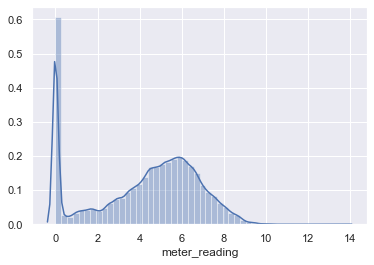

In [49]:
sns.set()
chilled_water=train_data[train_data['meter']==1]
ax=sns.distplot(np.log1p(chilled_water['meter_reading']),hist=True,bins=50)
ax

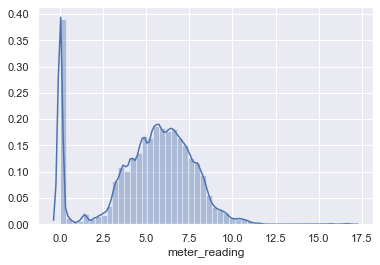

In [50]:
sns.set()
steam=train_data[train_data['meter']==2]
ax=sns.distplot(np.log1p(steam['meter_reading']),hist=True,bins=50)
ax

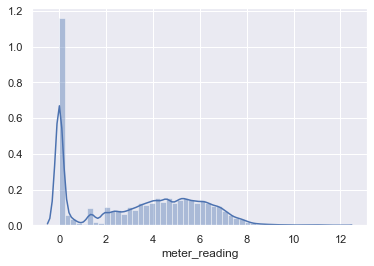

In [51]:
sns.set()
hot_water=train_data[train_data['meter']==3]
ax=sns.distplot(np.log1p(hot_water['meter_reading']),hist=True,bins=50)
ax

### Understanding data for one building

In [62]:
#Understanding data for one buidling
print("We can observe that for each building we have been given Eneregy consumption for that particular hourin kwH")
train_data[(train_data['building_id']==1295) & (train_data['meter']==3)]

We can observe that for each building we have been given Eneregy consumption for that particular hourin kwH


,building_id,meter,timestamp,meter_reading
1984,1295,3,2016-01-01 00:00:00,528.117
4277,1295,3,2016-01-01 01:00:00,582.892
6576,1295,3,2016-01-01 02:00:00,370.088
8872,1295,3,2016-01-01 03:00:00,438.069
11168,1295,3,2016-01-01 04:00:00,1408.850
...,...,...,...,...
20206310,1295,3,2016-12-31 19:00:00,538.759
20208675,1295,3,2016-12-31 20:00:00,393.930
20211040,1295,3,2016-12-31 21:00:00,477.801
20213407,1295,3,2016-12-31 22:00:00,567.711


In [85]:
sns.set()
train_data['time'] = pd.to_datetime(train_data['timestamp'])
train_data['dates'] = train_data['time'].dt.date
elec= train_data[(train_data['building_id']==1295) & (train_data['meter']==0)]
cw= train_data[(train_data['building_id']==1295) & (train_data['meter']==1)]
steam= train_data[(train_data['building_id']==1295) & (train_data['meter']==2)]
hw= train_data[(train_data['building_id']==1295) & (train_data['meter']==3)]
a=elec.groupby('dates').mean()
b=cw.groupby('dates').mean()
c=steam.groupby('dates').mean()
d=hw.groupby('dates').mean()
a=a.reset_index()
b=b.reset_index()
c=c.reset_index()
d=d.reset_index()

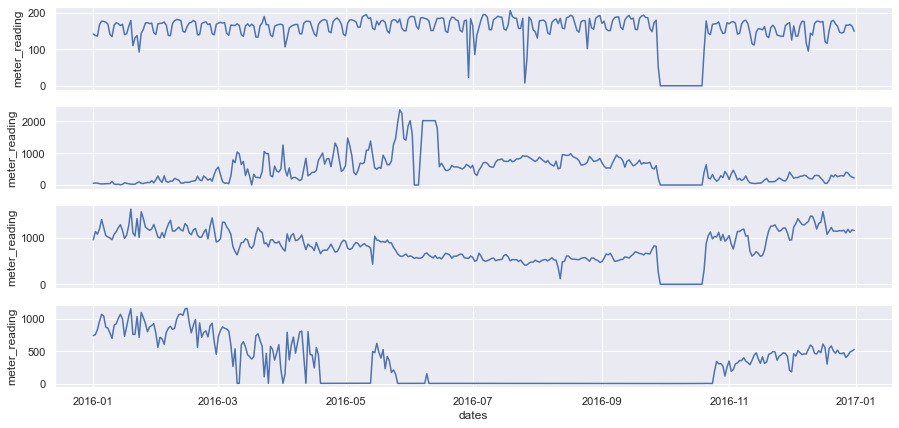

In [92]:
fig, axes = plt.subplots(4, 1, figsize=(15, 7), sharex=True)
sns.lineplot(x=a['dates'],y=a['meter_reading'],ax=axes[0])
sns.lineplot(x=b['dates'],y=b['meter_reading'],ax=axes[1])
sns.lineplot(x=c['dates'],y=c['meter_reading'],ax=axes[2])
sns.lineplot(x=d['dates'],y=d['meter_reading'],ax=axes[3])